# Importing Libraries

In [277]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Data Reading and analysis

In [278]:
df=pd.read_csv("diabetes.csv")

In [279]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [281]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [282]:
df["Insulin"].value_counts()

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
135      6
66       5
49       5
56       5
76       5
210      5
90       4
88       4
125      4
71       4
200      4
155      4
64       4
160      4
168      4
165      4
54       4
190      4
36       3
182      3
      ... 
191      1
166      1
188      1
184      1
171      1
119      1
255      1
318      1
91       1
310      1
81       1
304      1
300      1
183      1
86       1
291      1
89       1
284      1
280      1
258      1
278      1
277      1
275      1
274      1
272      1
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

As we can see here data has 374  0's in insulin so we converted all 0's with its median

# Replacing 0 with median

In [283]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

# Final Dataset

In [284]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Data Splitting using K-Fold cross validation

In [285]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [286]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [287]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Created A function For Plotting Confusion Matrix

In [288]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

# Created a random model for worst case scenario

In [289]:
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
predicted_y =np.argmax(predicted_y, axis=1)

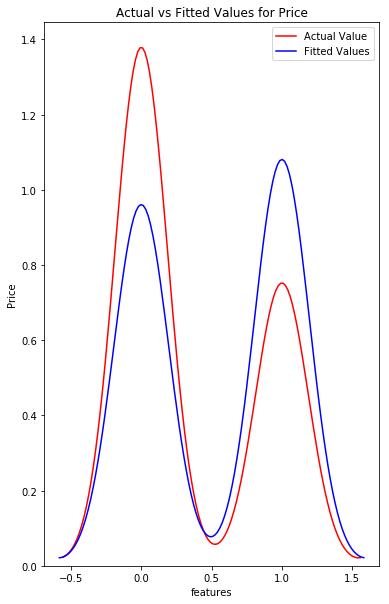

Log loss on Test Data using Random Model 16.93103927508001


In [290]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_y, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))

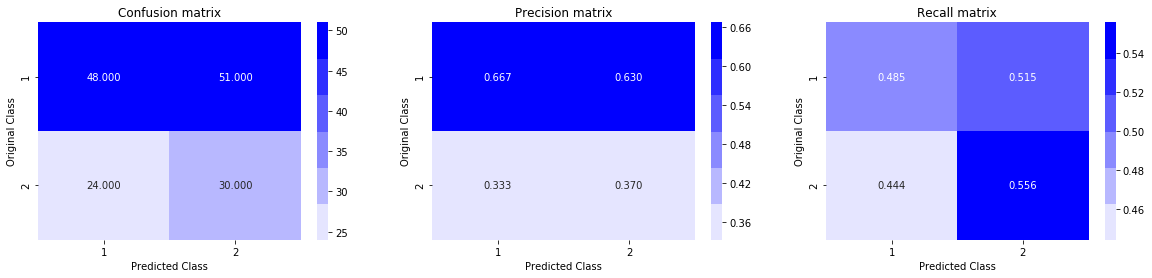

In [291]:
plot_confusion_matrix(y_test, predicted_y)

# Applying Stochastic Gradient Descent

In [292]:
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]

In [293]:
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    y_pred2= clf.predict(X_test)
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, y_pred2))

For values of alpha =  1e-06 The log loss is: 13.996257024901556
For values of alpha =  1e-05 The log loss is: 9.707138382362714
For values of alpha =  0.0001 The log loss is: 12.8675754249503
For values of alpha =  0.001 The log loss is: 8.804064539677642
For values of alpha =  0.01 The log loss is: 8.352566814287563
For values of alpha =  0.1 The log loss is: 8.804048861296655
For values of alpha =  1 The log loss is: 12.415910463496392
For values of alpha =  10 The log loss is: 12.190156374674357
For values of alpha =  100 The log loss is: 12.190156374674357
For values of alpha =  1000 The log loss is: 12.190156374674357


In [294]:
clf = SGDClassifier(alpha=0.1, penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
ynew = clf.predict(X_test)


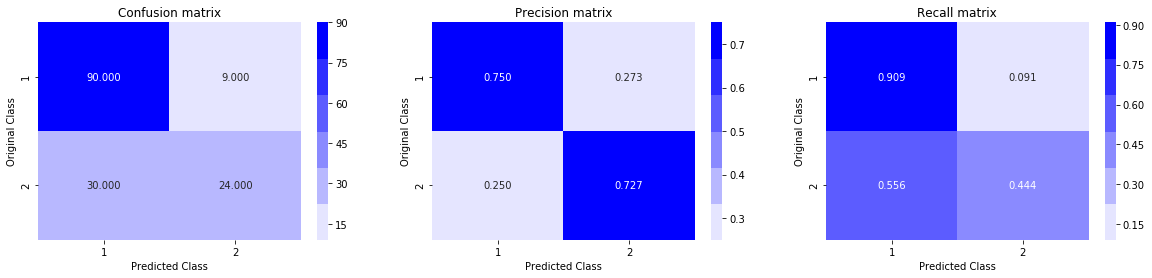

In [295]:
plot_confusion_matrix(y_test, ynew)

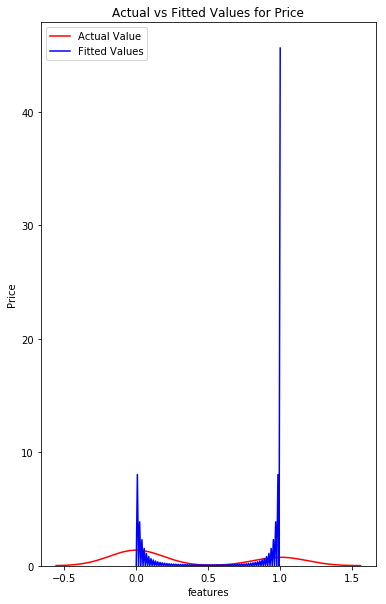

For values of alpha =  0.1 The log loss is: 8.804048861296655


In [296]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ynew, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print('For values of alpha = ', 0.1, "The log loss is:",log_loss(y_test, ynew))

# Using Logistic Regression with L2 Reg and Liblinear Optim. Algorithm

In [297]:
for i in alpha:
    LR = LogisticRegression(C=i, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, yhat))

For values of alpha =  1e-06 The log loss is: 7.901110897913445
For values of alpha =  1e-05 The log loss is: 7.901110897913445
For values of alpha =  0.0001 The log loss is: 7.901110897913445
For values of alpha =  0.001 The log loss is: 8.126854534481488
For values of alpha =  0.01 The log loss is: 7.449597494142384
For values of alpha =  0.1 The log loss is: 7.901084767278471
For values of alpha =  1 The log loss is: 7.901079541151477
For values of alpha =  10 The log loss is: 8.12682317771952
For values of alpha =  100 The log loss is: 8.12682317771952
For values of alpha =  1000 The log loss is: 8.12682317771952


In [298]:
R = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
yhat = R.predict(X_test)

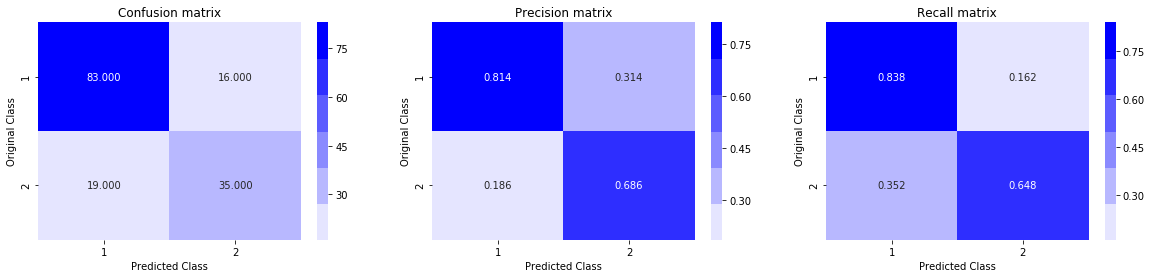

In [299]:
plot_confusion_matrix(y_test, yhat)

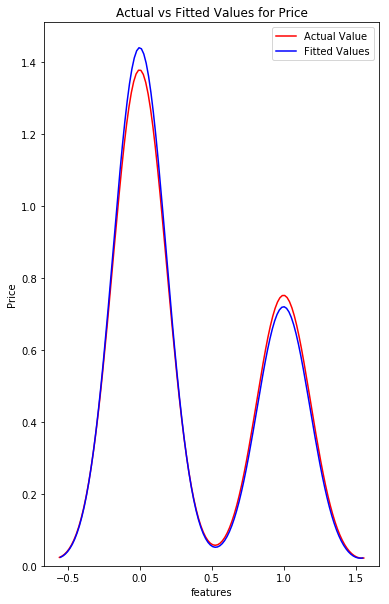

For values of alpha =  0.0001 The log loss is: 7.901110897913445


In [300]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print('For values of alpha = ', 0.0001, "The log loss is:",log_loss(y_test, yhat))

# Conclusion:
<br>
1.Log loss on Test Data using Random Model 16.93103927508001 #will be in range of 15-18 since it is random
<br>
<br>
2.For values of alpha =  0.1 The log loss is: 8.804048861296655 on Sgd 
<br>
<br>
3.For values of alpha =  0.0001 The log loss is: 7.901110897913445 on LR with L2 reg and liblinear optimizing algoritm
<br>
<br>
Since line are also well fitting from test dataset we go with 3rd option on this dataset to prdict diabetes

# Created By
<br>
<br>
<h3><b><i>Rishabh Gaur</i></b></h3>
<br>
<br>
<h3><b><i>Shashwat Shah</i></b></h3>